<a href="https://colab.research.google.com/github/jnsbrdbr/hopefully_last_thesis/blob/main/lastlasttwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-rc0

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.8.0


In [2]:
import keras
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

%matplotlib inline

In [3]:
# Import system packages
import os
import sys
import time
import logging
import importlib

#Import data manipulation libraries
import numpy as np
import pandas as pd
import collections
from tqdm import tqdm

#Import visualization libraries
import matplotlib.pyplot as plt

#Importing ML/DL libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,precision_recall_fscore_support, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix,accuracy_score

from keras import initializers
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation 
from keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate
import pickle
import copy

import tensorflow as tf

import random
random.seed(123)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
with pd.HDFStore('/content/drive/MyDrive/justin/total_result',  mode='r') as newstore:
    result = newstore.select('result')

In [6]:
result

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
0,-1.715972,-3.099936,-0.041249,-9.847494e-15,2.814883e-14,0.077295,1.691428,3.341114,2.248145e-13,-1.892775e-14,...,0.109748,0.187462,-0.926807,0.001555,2.603925e-11,-5.189091e-11,-0.002291,-1.817205,-0.021183,1
1,-1.715972,-3.099936,-0.041249,-1.896065e-14,-1.670765e-14,0.077295,1.691428,3.341114,-4.553240e-14,-7.798314e-14,...,0.109748,0.187462,-0.926807,0.001555,-9.481436e-12,2.031252e-11,-0.002291,-1.817205,-0.021183,1
2,-1.715972,-3.099936,-0.041249,-1.371470e-13,-1.120560e-13,0.077295,1.691428,3.341114,-7.958873e-14,-2.202776e-13,...,0.109748,0.187462,-0.926807,0.001555,-5.071955e-12,1.127633e-11,-0.002291,-1.817205,-0.021183,1
3,-1.715972,-3.099936,-0.041249,6.277415e-14,-1.657541e-13,0.077295,1.691428,3.341114,6.961887e-14,-1.492418e-13,...,0.109748,0.187462,-0.926807,0.001555,-1.244652e-11,2.576609e-11,-0.002291,-1.817205,-0.021183,1
4,-1.715972,-3.099936,-0.041249,-3.701367e-14,2.129133e-13,0.077295,1.691428,3.341114,1.081081e-13,1.537838e-13,...,-11.935691,-29.759005,-0.507027,-0.476180,6.215240e-13,-1.774149e-13,0.884093,-1.749524,-0.183266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.114893,-4.572474,-0.754679,3.266507e-13,-3.329586e-13,8.797502,-0.661164,-0.063010,9.856194e-03,-8.536521e-03,...,0.128642,0.210675,-1.647476,0.001097,6.209370e-13,3.990504e-13,-0.000867,-4.540979,-0.763937,1
996,-2.114893,-4.572474,-0.754679,3.270113e-13,-3.336144e-13,8.797502,-0.661164,-0.063010,-3.501650e-02,-6.797294e-02,...,0.128642,0.210675,-1.647476,0.001097,6.204323e-13,4.001116e-13,-0.000867,-4.540979,-0.763937,1
997,-2.114893,-4.572474,-0.754679,3.254696e-13,-3.330911e-13,8.797502,-0.661164,-0.063010,-1.889261e-02,-1.737909e-02,...,0.128642,0.210675,-1.647476,0.001097,6.208547e-13,3.993398e-13,-0.000867,-4.540979,-0.763937,1
998,-2.114893,-4.572474,-0.754679,3.253531e-13,-3.329030e-13,8.797502,-0.661164,-0.063010,3.132647e-02,-1.020799e-02,...,0.128642,0.210675,-1.647476,0.001097,6.207445e-13,3.997803e-13,-0.000867,-4.540979,-0.763937,1


In [7]:
result.rename(columns = {110:'label'}, inplace = True)

In [8]:
result

,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,label
0,-1.715972,-3.099936,-0.041249,-9.847494e-15,2.814883e-14,0.077295,1.691428,3.341114,2.248145e-13,-1.892775e-14,...,0.109748,0.187462,-0.926807,0.001555,2.603925e-11,-5.189091e-11,-0.002291,-1.817205,-0.021183,1
1,-1.715972,-3.099936,-0.041249,-1.896065e-14,-1.670765e-14,0.077295,1.691428,3.341114,-4.553240e-14,-7.798314e-14,...,0.109748,0.187462,-0.926807,0.001555,-9.481436e-12,2.031252e-11,-0.002291,-1.817205,-0.021183,1
2,-1.715972,-3.099936,-0.041249,-1.371470e-13,-1.120560e-13,0.077295,1.691428,3.341114,-7.958873e-14,-2.202776e-13,...,0.109748,0.187462,-0.926807,0.001555,-5.071955e-12,1.127633e-11,-0.002291,-1.817205,-0.021183,1
3,-1.715972,-3.099936,-0.041249,6.277415e-14,-1.657541e-13,0.077295,1.691428,3.341114,6.961887e-14,-1.492418e-13,...,0.109748,0.187462,-0.926807,0.001555,-1.244652e-11,2.576609e-11,-0.002291,-1.817205,-0.021183,1
4,-1.715972,-3.099936,-0.041249,-3.701367e-14,2.129133e-13,0.077295,1.691428,3.341114,1.081081e-13,1.537838e-13,...,-11.935691,-29.759005,-0.507027,-0.476180,6.215240e-13,-1.774149e-13,0.884093,-1.749524,-0.183266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.114893,-4.572474,-0.754679,3.266507e-13,-3.329586e-13,8.797502,-0.661164,-0.063010,9.856194e-03,-8.536521e-03,...,0.128642,0.210675,-1.647476,0.001097,6.209370e-13,3.990504e-13,-0.000867,-4.540979,-0.763937,1
996,-2.114893,-4.572474,-0.754679,3.270113e-13,-3.336144e-13,8.797502,-0.661164,-0.063010,-3.501650e-02,-6.797294e-02,...,0.128642,0.210675,-1.647476,0.001097,6.204323e-13,4.001116e-13,-0.000867,-4.540979,-0.763937,1
997,-2.114893,-4.572474,-0.754679,3.254696e-13,-3.330911e-13,8.797502,-0.661164,-0.063010,-1.889261e-02,-1.737909e-02,...,0.128642,0.210675,-1.647476,0.001097,6.208547e-13,3.993398e-13,-0.000867,-4.540979,-0.763937,1
998,-2.114893,-4.572474,-0.754679,3.253531e-13,-3.329030e-13,8.797502,-0.661164,-0.063010,3.132647e-02,-1.020799e-02,...,0.128642,0.210675,-1.647476,0.001097,6.207445e-13,3.997803e-13,-0.000867,-4.540979,-0.763937,1


In [9]:
#divide data in to data_label and non_data label

y=result.label
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(len(y)):
  if y[i]==1:
    y[i]=0
  else:
    y[i]=1

result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel

In [10]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.3,shuffle=True,random_state=1)#random_state=42,

In [11]:
#number of fake in y
print('Number of fake in y:',collections.Counter(y)[1])

#number of real in y
print('Number of real in y:',collections.Counter(y)[0])

#number of fake in y_train
print('Number of fake in y_train:',collections.Counter(y_train)[1])

#number of real in y_train
print('Number of real in y_train:',collections.Counter(y_train)[0])

#number of fake in y_test
print('Number of fake in y_test:',collections.Counter(y_test)[1])

#number of real in y_test
print('Number of real in y_test:',collections.Counter(y_test)[0])

Number of fake in y: 10
Number of real in y: 990
Number of fake in y_train: 7
Number of real in y_train: 693
Number of fake in y_test: 3
Number of real in y_test: 297


In [12]:
#Subsetting only Normal Network packets in our training set

temp_df = X_train.copy()
temp_df['label'] = y_train
temp_df = temp_df.loc[temp_df['label'] == 0]
temp_df = temp_df.drop('label', axis = 1)
x_train = temp_df.copy()

In [13]:
# Normalize the above splits using the MinMaxScaler from the scikit learn package
scaler = MinMaxScaler()

# Make sure to only fit the scaler on the training data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Creating dataset dictionary 
dataset = {}
dataset['x_train'] = x_train.astype(np.float32)
dataset['y_train'] = y_train.astype(np.float32)
dataset['x_test']  = x_test.astype(np.float32)
dataset['y_test']  = y_test.astype(np.float32)

In [14]:
# check how many anomalies are in our Testing set
print('Number of Normal Network packets in the Training set:', x_train.shape[0])
print('Number of Normal Network packets in the Testing set:', collections.Counter(y_test)[0])
print('Number of Anomalous Network packets in the Testing set:', collections.Counter(y_test)[1])

Number of Normal Network packets in the Training set: 693
Number of Normal Network packets in the Testing set: 297
Number of Anomalous Network packets in the Testing set: 3


In [15]:
# Defining the Generator network

def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=110, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    #generator.add(Dense(64))
    #generator.add(Activation('tanh'))
    
    #generator.add(Dense(128))
    #generator.add(Activation('tanh'))
    
    #generator.add(Dense(128))
    #generator.add(Activation('tanh'))
       
    #generator.add(Dense(256))
    #generator.add(Activation('tanh'))

    #generator.add(Dense(256))
    #generator.add(Activation('tanh'))
   
    generator.add(Dense(110, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [16]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=110, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    #discriminator.add(Dense(128))
    #discriminator.add(Activation('relu'))
    #discriminator.add(Dropout(0.2))

    #discriminator.add(Dense(128))
    #discriminator.add(Activation('relu'))
    #discriminator.add(Dropout(0.2))

    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [17]:
def get_gan_network(discriminator, generator, optimizer,input_dim=110):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input)        
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

In [18]:
len(x_test)

300

In [19]:
learning_rate = 0.00001
batch_size = 16
epochs = 100
adam = Adam(lr = learning_rate,beta_1 = 0.5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
#Training the GAN
x_train, y_train, x_test, y_test = dataset['x_train'], dataset['y_train'],dataset['x_test'],dataset['y_test']

#Calculating the number of batches based on the batch size
batch_count = x_train.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=110)


for epoch in range(epochs):        
    for index in range(batch_count):        
        pbar.update(1)        
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,110])
        
        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)
        
        #Obtain a batch of normal network packets
        image_batch = x_train[index * batch_size: (index + 1) * batch_size]
            
        X = np.vstack((generated_images,image_batch))       
        y_dis = np.ones(2*batch_size) 
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 110])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)
        
        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)
        
    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))

  1%|          | 47/4300 [00:05<03:12, 22.13it/s]

Epoch 0 Batch 42/43 [D loss: 0.676431] [G loss:0.672164]


  2%|▏         | 89/4300 [00:07<03:26, 20.40it/s]

Epoch 1 Batch 42/43 [D loss: 0.653460] [G loss:0.697439]


  3%|▎         | 131/4300 [00:09<03:29, 19.90it/s]

Epoch 2 Batch 42/43 [D loss: 0.603071] [G loss:0.718109]


  4%|▍         | 174/4300 [00:11<03:33, 19.35it/s]

Epoch 3 Batch 42/43 [D loss: 0.587000] [G loss:0.689519]


  5%|▌         | 219/4300 [00:14<03:33, 19.15it/s]

Epoch 4 Batch 42/43 [D loss: 0.557736] [G loss:0.663918]


  6%|▌         | 261/4300 [00:17<04:41, 14.34it/s]

Epoch 5 Batch 42/43 [D loss: 0.517373] [G loss:0.720479]


  7%|▋         | 305/4300 [00:19<03:48, 17.47it/s]

Epoch 6 Batch 42/43 [D loss: 0.484691] [G loss:0.705411]


  8%|▊         | 347/4300 [00:21<03:11, 20.60it/s]

Epoch 7 Batch 42/43 [D loss: 0.462767] [G loss:0.665097]


  9%|▉         | 390/4300 [00:23<03:21, 19.42it/s]

Epoch 8 Batch 42/43 [D loss: 0.406054] [G loss:0.642700]


 10%|█         | 435/4300 [00:25<03:26, 18.71it/s]

Epoch 9 Batch 42/43 [D loss: 0.401614] [G loss:0.606843]


 11%|█         | 480/4300 [00:28<02:29, 25.56it/s]

Epoch 10 Batch 42/43 [D loss: 0.380306] [G loss:0.534449]


 12%|█▏        | 526/4300 [00:29<01:19, 47.40it/s]

Epoch 11 Batch 42/43 [D loss: 0.389332] [G loss:0.475785]


 13%|█▎        | 565/4300 [00:29<01:14, 49.82it/s]

Epoch 12 Batch 42/43 [D loss: 0.315011] [G loss:0.441734]


 14%|█▍        | 608/4300 [00:30<01:18, 46.84it/s]

Epoch 13 Batch 42/43 [D loss: 0.310764] [G loss:0.395012]


 15%|█▌        | 653/4300 [00:31<01:17, 46.83it/s]

Epoch 14 Batch 42/43 [D loss: 0.278133] [G loss:0.350678]


 16%|█▌        | 694/4300 [00:32<01:12, 49.45it/s]

Epoch 15 Batch 42/43 [D loss: 0.215914] [G loss:0.298056]


 17%|█▋        | 737/4300 [00:33<01:12, 48.94it/s]

Epoch 16 Batch 42/43 [D loss: 0.220858] [G loss:0.203335]


 18%|█▊        | 781/4300 [00:34<01:12, 48.60it/s]

Epoch 17 Batch 42/43 [D loss: 0.197841] [G loss:0.199398]


 19%|█▉        | 825/4300 [00:35<01:09, 50.28it/s]

Epoch 18 Batch 42/43 [D loss: 0.202090] [G loss:0.187690]


 20%|██        | 867/4300 [00:36<01:07, 51.03it/s]

Epoch 19 Batch 42/43 [D loss: 0.193157] [G loss:0.142922]


 21%|██        | 912/4300 [00:37<01:12, 46.89it/s]

Epoch 20 Batch 42/43 [D loss: 0.194572] [G loss:0.115563]


 22%|██▏       | 954/4300 [00:37<01:08, 48.88it/s]

Epoch 21 Batch 42/43 [D loss: 0.128132] [G loss:0.112602]


 23%|██▎       | 994/4300 [00:38<01:20, 40.82it/s]

Epoch 22 Batch 42/43 [D loss: 0.147416] [G loss:0.078280]


 24%|██▍       | 1039/4300 [00:39<01:17, 42.06it/s]

Epoch 23 Batch 42/43 [D loss: 0.146359] [G loss:0.060141]


 25%|██▌       | 1082/4300 [00:40<01:08, 47.02it/s]

Epoch 24 Batch 42/43 [D loss: 0.094785] [G loss:0.053651]


 26%|██▌       | 1126/4300 [00:41<01:04, 49.39it/s]

Epoch 25 Batch 42/43 [D loss: 0.084159] [G loss:0.058326]


 27%|██▋       | 1169/4300 [00:42<01:08, 45.75it/s]

Epoch 26 Batch 42/43 [D loss: 0.114384] [G loss:0.049325]


 28%|██▊       | 1209/4300 [00:43<01:10, 43.81it/s]

Epoch 27 Batch 42/43 [D loss: 0.088530] [G loss:0.061729]


 29%|██▉       | 1257/4300 [00:44<01:01, 49.36it/s]

Epoch 28 Batch 42/43 [D loss: 0.095388] [G loss:0.045036]


 30%|███       | 1299/4300 [00:45<01:01, 49.16it/s]

Epoch 29 Batch 42/43 [D loss: 0.080911] [G loss:0.063653]


 31%|███       | 1341/4300 [00:46<01:05, 45.29it/s]

Epoch 30 Batch 42/43 [D loss: 0.054384] [G loss:0.030640]


 32%|███▏      | 1386/4300 [00:47<01:03, 45.94it/s]

Epoch 31 Batch 42/43 [D loss: 0.069687] [G loss:0.028372]


 33%|███▎      | 1430/4300 [00:48<00:57, 50.20it/s]

Epoch 32 Batch 42/43 [D loss: 0.064320] [G loss:0.033863]


 34%|███▍      | 1471/4300 [00:49<01:02, 45.60it/s]

Epoch 33 Batch 42/43 [D loss: 0.047869] [G loss:0.042596]


 35%|███▌      | 1511/4300 [00:50<01:02, 44.28it/s]

Epoch 34 Batch 42/43 [D loss: 0.035479] [G loss:0.021498]


 36%|███▌      | 1558/4300 [00:51<00:59, 46.25it/s]

Epoch 35 Batch 42/43 [D loss: 0.036742] [G loss:0.035850]


 37%|███▋      | 1599/4300 [00:51<00:57, 47.19it/s]

Epoch 36 Batch 42/43 [D loss: 0.058843] [G loss:0.020546]


 38%|███▊      | 1641/4300 [00:52<00:58, 45.55it/s]

Epoch 37 Batch 42/43 [D loss: 0.057630] [G loss:0.028790]


 39%|███▉      | 1687/4300 [00:53<00:56, 46.14it/s]

Epoch 38 Batch 42/43 [D loss: 0.079881] [G loss:0.009871]


 40%|████      | 1727/4300 [00:54<00:56, 45.87it/s]

Epoch 39 Batch 42/43 [D loss: 0.040997] [G loss:0.015535]


 41%|████      | 1769/4300 [00:55<01:08, 36.96it/s]

Epoch 40 Batch 42/43 [D loss: 0.067027] [G loss:0.028276]


 42%|████▏     | 1815/4300 [00:56<00:55, 44.58it/s]

Epoch 41 Batch 42/43 [D loss: 0.041204] [G loss:0.023850]


 43%|████▎     | 1858/4300 [00:57<00:57, 42.21it/s]

Epoch 42 Batch 42/43 [D loss: 0.033658] [G loss:0.008609]


 44%|████▍     | 1898/4300 [00:58<00:56, 42.62it/s]

Epoch 43 Batch 42/43 [D loss: 0.041561] [G loss:0.012041]


 45%|████▌     | 1944/4300 [00:59<00:52, 44.87it/s]

Epoch 44 Batch 42/43 [D loss: 0.020764] [G loss:0.015119]


 46%|████▌     | 1986/4300 [01:00<00:48, 47.40it/s]

Epoch 45 Batch 42/43 [D loss: 0.020100] [G loss:0.008507]


 47%|████▋     | 2027/4300 [01:01<00:56, 40.06it/s]

Epoch 46 Batch 42/43 [D loss: 0.030962] [G loss:0.005706]


 48%|████▊     | 2070/4300 [01:02<00:52, 42.30it/s]

Epoch 47 Batch 42/43 [D loss: 0.034071] [G loss:0.017456]


 49%|████▉     | 2113/4300 [01:03<00:50, 43.07it/s]

Epoch 48 Batch 42/43 [D loss: 0.028655] [G loss:0.004185]


 50%|█████     | 2158/4300 [01:04<00:51, 41.82it/s]

Epoch 49 Batch 42/43 [D loss: 0.029874] [G loss:0.013049]


 51%|█████     | 2203/4300 [01:05<00:45, 46.47it/s]

Epoch 50 Batch 42/43 [D loss: 0.018756] [G loss:0.015839]


 52%|█████▏    | 2244/4300 [01:06<00:43, 47.34it/s]

Epoch 51 Batch 42/43 [D loss: 0.015678] [G loss:0.012031]


 53%|█████▎    | 2289/4300 [01:07<00:44, 45.47it/s]

Epoch 52 Batch 42/43 [D loss: 0.019100] [G loss:0.011819]


 54%|█████▍    | 2330/4300 [01:08<00:43, 45.12it/s]

Epoch 53 Batch 42/43 [D loss: 0.015505] [G loss:0.010089]


 55%|█████▌    | 2371/4300 [01:09<00:40, 47.55it/s]

Epoch 54 Batch 42/43 [D loss: 0.010623] [G loss:0.010355]


 56%|█████▌    | 2413/4300 [01:10<00:42, 44.76it/s]

Epoch 55 Batch 42/43 [D loss: 0.018284] [G loss:0.004271]


 57%|█████▋    | 2458/4300 [01:11<00:44, 41.64it/s]

Epoch 56 Batch 42/43 [D loss: 0.021985] [G loss:0.007147]


 58%|█████▊    | 2504/4300 [01:12<00:38, 46.76it/s]

Epoch 57 Batch 42/43 [D loss: 0.018432] [G loss:0.003150]


 59%|█████▉    | 2545/4300 [01:13<00:38, 45.41it/s]

Epoch 58 Batch 42/43 [D loss: 0.014934] [G loss:0.002421]


 60%|██████    | 2590/4300 [01:14<00:36, 46.50it/s]

Epoch 59 Batch 42/43 [D loss: 0.026683] [G loss:0.003577]


 61%|██████    | 2632/4300 [01:15<00:35, 47.45it/s]

Epoch 60 Batch 42/43 [D loss: 0.011260] [G loss:0.005968]


 62%|██████▏   | 2673/4300 [01:16<00:35, 45.43it/s]

Epoch 61 Batch 42/43 [D loss: 0.016471] [G loss:0.005856]


 63%|██████▎   | 2718/4300 [01:17<00:35, 45.15it/s]

Epoch 62 Batch 42/43 [D loss: 0.020011] [G loss:0.004506]


 64%|██████▍   | 2759/4300 [01:18<00:31, 48.54it/s]

Epoch 63 Batch 42/43 [D loss: 0.010070] [G loss:0.001787]


 65%|██████▌   | 2805/4300 [01:18<00:30, 48.27it/s]

Epoch 64 Batch 42/43 [D loss: 0.009761] [G loss:0.003601]


 66%|██████▌   | 2847/4300 [01:19<00:30, 47.79it/s]

Epoch 65 Batch 42/43 [D loss: 0.018794] [G loss:0.003783]


 67%|██████▋   | 2887/4300 [01:20<00:28, 49.87it/s]

Epoch 66 Batch 42/43 [D loss: 0.010287] [G loss:0.002263]


 68%|██████▊   | 2930/4300 [01:21<00:28, 48.39it/s]

Epoch 67 Batch 42/43 [D loss: 0.016719] [G loss:0.006094]


 69%|██████▉   | 2971/4300 [01:22<00:30, 43.82it/s]

Epoch 68 Batch 42/43 [D loss: 0.009759] [G loss:0.003061]


 70%|███████   | 3018/4300 [01:23<00:26, 47.90it/s]

Epoch 69 Batch 42/43 [D loss: 0.005532] [G loss:0.002878]


 71%|███████   | 3060/4300 [01:24<00:27, 45.20it/s]

Epoch 70 Batch 42/43 [D loss: 0.006670] [G loss:0.005599]


 72%|███████▏  | 3102/4300 [01:25<00:28, 42.52it/s]

Epoch 71 Batch 42/43 [D loss: 0.027787] [G loss:0.000936]


 73%|███████▎  | 3146/4300 [01:26<00:23, 48.53it/s]

Epoch 72 Batch 42/43 [D loss: 0.010186] [G loss:0.001020]


 74%|███████▍  | 3192/4300 [01:27<00:22, 48.48it/s]

Epoch 73 Batch 42/43 [D loss: 0.016870] [G loss:0.002176]


 75%|███████▌  | 3234/4300 [01:28<00:20, 50.98it/s]

Epoch 74 Batch 42/43 [D loss: 0.011254] [G loss:0.001986]


 76%|███████▌  | 3276/4300 [01:28<00:22, 46.01it/s]

Epoch 75 Batch 42/43 [D loss: 0.006984] [G loss:0.001613]


 77%|███████▋  | 3318/4300 [01:29<00:19, 51.25it/s]

Epoch 76 Batch 42/43 [D loss: 0.021525] [G loss:0.002844]


 78%|███████▊  | 3360/4300 [01:30<00:18, 50.96it/s]

Epoch 77 Batch 42/43 [D loss: 0.004596] [G loss:0.003093]


 79%|███████▉  | 3402/4300 [01:31<00:18, 47.54it/s]

Epoch 78 Batch 42/43 [D loss: 0.004992] [G loss:0.003252]


 80%|████████  | 3447/4300 [01:32<00:18, 46.89it/s]

Epoch 79 Batch 42/43 [D loss: 0.005159] [G loss:0.001324]


 81%|████████  | 3492/4300 [01:33<00:19, 42.28it/s]

Epoch 80 Batch 42/43 [D loss: 0.004301] [G loss:0.000463]


 82%|████████▏ | 3532/4300 [01:34<00:18, 42.27it/s]

Epoch 81 Batch 42/43 [D loss: 0.014898] [G loss:0.003117]


 83%|████████▎ | 3577/4300 [01:35<00:16, 43.74it/s]

Epoch 82 Batch 42/43 [D loss: 0.009519] [G loss:0.008465]


 84%|████████▍ | 3619/4300 [01:36<00:14, 48.36it/s]

Epoch 83 Batch 42/43 [D loss: 0.060816] [G loss:0.000929]


 85%|████████▌ | 3665/4300 [01:37<00:14, 44.43it/s]

Epoch 84 Batch 42/43 [D loss: 0.020545] [G loss:0.000438]


 86%|████████▌ | 3705/4300 [01:38<00:14, 41.78it/s]

Epoch 85 Batch 42/43 [D loss: 0.004313] [G loss:0.001642]


 87%|████████▋ | 3751/4300 [01:39<00:11, 47.41it/s]

Epoch 86 Batch 42/43 [D loss: 0.017178] [G loss:0.000775]


 88%|████████▊ | 3791/4300 [01:40<00:12, 42.28it/s]

Epoch 87 Batch 42/43 [D loss: 0.013501] [G loss:0.000388]


 89%|████████▉ | 3836/4300 [01:41<00:10, 46.38it/s]

Epoch 88 Batch 42/43 [D loss: 0.054193] [G loss:0.001116]


 90%|█████████ | 3877/4300 [01:42<00:08, 51.95it/s]

Epoch 89 Batch 42/43 [D loss: 0.021924] [G loss:0.000926]


 91%|█████████ | 3920/4300 [01:42<00:07, 48.41it/s]

Epoch 90 Batch 42/43 [D loss: 0.016698] [G loss:0.001845]


 92%|█████████▏| 3965/4300 [01:44<00:07, 43.20it/s]

Epoch 91 Batch 42/43 [D loss: 0.007806] [G loss:0.000785]


 93%|█████████▎| 4005/4300 [01:45<00:07, 41.23it/s]

Epoch 92 Batch 42/43 [D loss: 0.006968] [G loss:0.001878]


 94%|█████████▍| 4050/4300 [01:46<00:05, 45.21it/s]

Epoch 93 Batch 42/43 [D loss: 0.003999] [G loss:0.001393]


 95%|█████████▌| 4096/4300 [01:47<00:04, 47.10it/s]

Epoch 94 Batch 42/43 [D loss: 0.003796] [G loss:0.002675]


 96%|█████████▋| 4139/4300 [01:47<00:03, 50.59it/s]

Epoch 95 Batch 42/43 [D loss: 0.008143] [G loss:0.000138]


 97%|█████████▋| 4177/4300 [01:48<00:02, 43.92it/s]

Epoch 96 Batch 42/43 [D loss: 0.035209] [G loss:0.000614]


 98%|█████████▊| 4222/4300 [01:49<00:01, 42.14it/s]

Epoch 97 Batch 42/43 [D loss: 0.003131] [G loss:0.001809]


 99%|█████████▉| 4264/4300 [01:50<00:00, 49.13it/s]

Epoch 98 Batch 42/43 [D loss: 0.003343] [G loss:0.001124]


100%|█████████▉| 4299/4300 [01:51<00:00, 48.41it/s]

Epoch 99 Batch 42/43 [D loss: 0.001804] [G loss:0.002016]


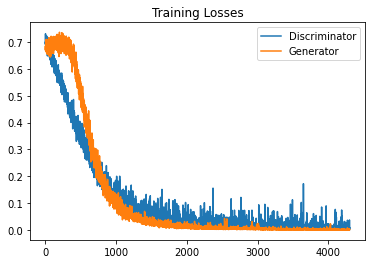

In [21]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [22]:
# Predictions on the test set

nr_batches_test = np.ceil(x_test.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
   ran_from = t * batch_size
   if ran_from<len(x_test):
              #print(ran_from)
              ran_to = (t + 1) * batch_size
              #print(ran_to)
              image_batch = x_test[ran_from:ran_to] 
              #print(image_batch)          
              tmp_rslt = discriminator.predict(x=image_batch,batch_size=4,verbose=0)        
              #print(tmp_rslt)
              results = np.append(results, tmp_rslt)
              #print(results)

In [23]:
y_test=np.array(y_test)

In [24]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y_test)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal packets :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous packets :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal packets : 0.9923279612554042
Mean score for anomalous packets : 0.9994165698687235


In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(results_df)

                 results               y_test
0              0.9992324            0.0000000
1              0.9999223            0.0000000
2              0.9989641            0.0000000
3              0.9989676            0.0000000
4              0.9994384            0.0000000
5              0.9993750            0.0000000
6              0.9946026            0.0000000
7              0.9998949            0.0000000
8              0.9966737            0.0000000
9              0.9993710            0.0000000
10             0.9986395            0.0000000
11             0.9991969            0.0000000
12             0.9992616            0.0000000
13             0.9970996            0.0000000
14             0.9991128            0.0000000
15             0.9992008            0.0000000
16             0.9996002            0.0000000
17             0.9994681            0.0000000
18             0.9987544            0.0000000
19             0.9982195            0.0000000
20             0.9998597          